# Indian Crime Data Analysis

# Hypothesis

A detail analysis and visualization of the crimes committed.

The objective of this project is to find out which state has the highest crime rate and which is the crime that is committed.

We’ll be importing pandas library to access the data-set. After that, we’ll read our CSV file into a data frame (df).

In [9]:
import pandas as pd
df = pd.read_csv('https://query.data.world/s/2flixt3ifiq4j43dr5is3u362jnugw')
df.head()

,STATE/UT,CRIME HEAD,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,ANDHRA PRADESH,INFANTICIDE,1,1,3,0,0,0,1,0,5,6,1,6
1,ARUNACHAL PRADESH,INFANTICIDE,0,0,0,0,0,0,0,0,0,0,0,0
2,ASSAM,INFANTICIDE,0,5,0,0,1,0,0,0,0,0,0,0
3,BIHAR,INFANTICIDE,0,0,0,0,2,0,2,2,0,2,5,2
4,CHHATTISGARH,INFANTICIDE,7,29,5,12,0,15,11,6,2,0,10,5


# DATA WRANGLING

Data wrangling is the process of cleaning complex data sets for doing operations and analysis. 

Since the values are present in yearly format we’ll club them to do the operations. For that, we’ll use the following code:-

In [10]:
df['total']=df.iloc[:,-12:].sum(axis=1)
df.head()

,STATE/UT,CRIME HEAD,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,total
0,ANDHRA PRADESH,INFANTICIDE,1,1,3,0,0,0,1,0,5,6,1,6,24
1,ARUNACHAL PRADESH,INFANTICIDE,0,0,0,0,0,0,0,0,0,0,0,0,0
2,ASSAM,INFANTICIDE,0,5,0,0,1,0,0,0,0,0,0,0,6
3,BIHAR,INFANTICIDE,0,0,0,0,2,0,2,2,0,2,5,2,15
4,CHHATTISGARH,INFANTICIDE,7,29,5,12,0,15,11,6,2,0,10,5,102


Now, that we have added a new column we don’t need all the other columns so to simplify our data frame we’ll drop them.

In [11]:
df.drop(df.columns[[2,3,4,5,6,7,8,9,10,11,12,13]], axis = 1, inplace = True)
df.head()

,STATE/UT,CRIME HEAD,total
0,ANDHRA PRADESH,INFANTICIDE,24
1,ARUNACHAL PRADESH,INFANTICIDE,0
2,ASSAM,INFANTICIDE,6
3,BIHAR,INFANTICIDE,15
4,CHHATTISGARH,INFANTICIDE,102


To get a concise summary of the data frame we’ll use info() function. It helps obtain a quick overview of the data-set.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   STATE/UT    494 non-null    object
 1   CRIME HEAD  494 non-null    object
 2   total       494 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 11.7+ KB


As we can see in the output, the summary includes a list of all columns with their data types and the number of non-null values in each column. And since our values are not null we don’t have to fill the missing values.

We just want to access the State & Union territory data against the crimes. So we’ll drop rows containing a total of the values, for better visualization.

In [13]:
d=df[:-38] #to drop total crime rows

dropped the last 38 rows containing the total values.

# DATA VISUALIZATION

Visualization of data helps in understanding the trends, outliers, and patterns in the data.


We’ll plot a bar graph to know which crime was most prevalent in India. For that, we’ll be importing ‘matplotlib’ library to plot the graph with just 3 lines of code.

<BarContainer object of 456 artists>

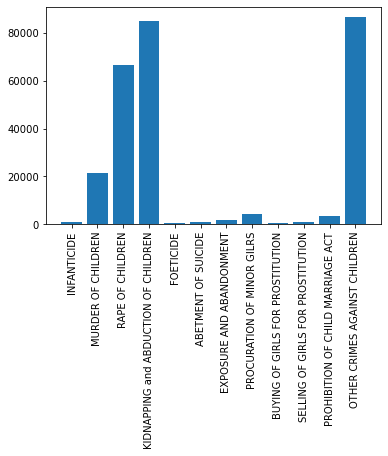

In [14]:
import matplotlib.pyplot as plt
plt.xticks(rotation='vertical')
plt.bar(x="CRIME HEAD", height="total", width=0.8, bottom=None, align='center', data=d)

From the graph, we can see that the ‘other crimes’ category has the highest number followed by “Kidnapping” and “Rape” of children. So, we’ll focus on these types as they are more prevalent.

In [ ]:
We’ll analyze specific crimes one by one to get better insights. First on the list is kidnapping.

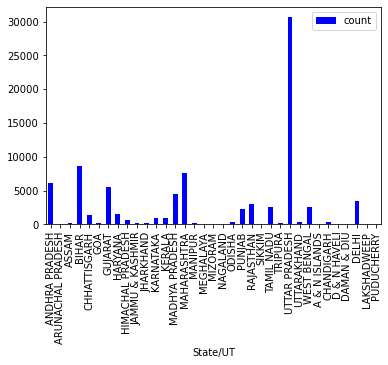

In [25]:
#Analyzing a specific crime-kidnapping

kidnap = d[d.crime_list.str.contains('KIDNAPPING and ABDUCTION OF CHILDREN')]
kidnap.shape
k=kidnap.drop(kidnap.index[[-1,-2,-10]])
k.plot(kind='bar',x='State/UT',y='count',color='blue')

By seeing the graph we can point out that Uttar Pradesh has the highest number of kidnapping with a total of 30,625 cases which is 38% of total states. This is an appalling number for a state, there has been chaos. Because of such high rates, people are spreading false rumors of child abduction and kidnapping. And due to this situation, the state has announced: “Charges under the National Security Act (NSA) will be pressed against the accused if such cases are reported in the future.”

In [26]:
#Now, we’ll visualize the second-highest crime i.e. Rape of children.

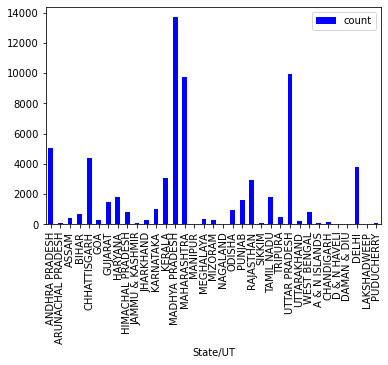

In [29]:
#Analyzing a specific crime-rape

rape = d[d.crime_list.str.contains('RAPE OF CHILDREN')]
r=rape.drop(rape.index[[-1,-2,-10]])
r.plot(kind='bar',x='State/UT',y='count',color='blue')

The graph shows that Madhya Pradesh accounts for most rape cases. To fight this, the state has adopted law to award death sentences to those found guilty of raping minors, a landmark decision in a state that recorded the highest number of child rapes.

In [17]:
rape.shape

(38, 3)

In [18]:
rape

,State/UT,crime_list,count
76,ANDHRA PRADESH,RAPE OF CHILDREN,5023
77,ARUNACHAL PRADESH,RAPE OF CHILDREN,96
78,ASSAM,RAPE OF CHILDREN,443
79,BIHAR,RAPE OF CHILDREN,692
80,CHHATTISGARH,RAPE OF CHILDREN,4391
81,GOA,RAPE OF CHILDREN,309
82,GUJARAT,RAPE OF CHILDREN,1514
83,HARYANA,RAPE OF CHILDREN,1785
84,HIMACHAL PRADESH,RAPE OF CHILDREN,819
85,JAMMU & KASHMIR,RAPE OF CHILDREN,79


In [19]:
r=rape.drop(rape.index[[-1,-2,-10]])

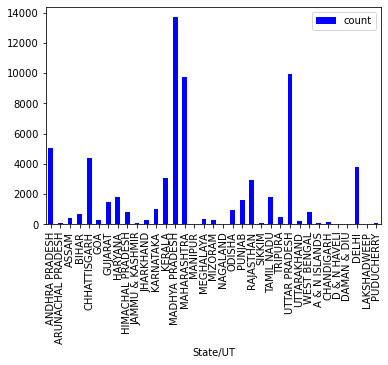

In [20]:
r.plot(kind='bar',x='State/UT',y='count',color='blue')

In [31]:
#Analyzing a specific crime-kidnapping

kidnap = d[d.crime_list.str.contains('KIDNAPPING and ABDUCTION OF CHILDREN')]
kidnap.shape
kidnap

,State/UT,crime_list,count
114,ANDHRA PRADESH,KIDNAPPING and ABDUCTION OF CHILDREN,6093
115,ARUNACHAL PRADESH,KIDNAPPING and ABDUCTION OF CHILDREN,105
116,ASSAM,KIDNAPPING and ABDUCTION OF CHILDREN,204
117,BIHAR,KIDNAPPING and ABDUCTION OF CHILDREN,8579
118,CHHATTISGARH,KIDNAPPING and ABDUCTION OF CHILDREN,1333
119,GOA,KIDNAPPING and ABDUCTION OF CHILDREN,160
120,GUJARAT,KIDNAPPING and ABDUCTION OF CHILDREN,5558
121,HARYANA,KIDNAPPING and ABDUCTION OF CHILDREN,1609
122,HIMACHAL PRADESH,KIDNAPPING and ABDUCTION OF CHILDREN,591
123,JAMMU & KASHMIR,KIDNAPPING and ABDUCTION OF CHILDREN,219


Here the Highest of the data comes from Total(All-India) followed by Total(States) and individually we analysed Uttar Pradesh is the state with highest number of cases in kidnapping and abduction of children following by Bihar and Maharashtra.

In [22]:
k=kidnap.drop(kidnap.index[[-1,-2,-10]])

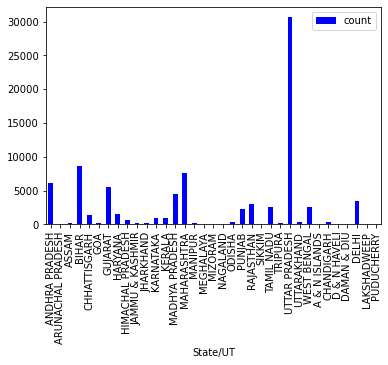

In [23]:
k.plot(kind='bar',x='State/UT',y='count',color='blue')

#Hence plotting the same on graph it shows Uttar Pradesh has the highest number of cases folowing by Bihar,Maharashtra and Andhra Pradesh.